In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('../input/Google.csv')

Choosing 'Close' as our target variable

In [3]:
data=data.iloc[:,4].values
data=pd.DataFrame(data)



Splitting dataset into train and test

In [4]:
train_data=data.iloc[0:2500].values
test_data=data.iloc[2500: ,].values
test_data=pd.DataFrame(test_data)
train_data=pd.DataFrame(train_data)


Scaling the train dataset

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range =(0,1))
train_data_scaled=sc.fit_transform(train_data)
train_data_scaled=pd.DataFrame(train_data_scaled)

In [6]:
x_train=[]
y_train=[]

Selecting 90 values for data structure

In [7]:
for i in range(90,2500):
    x_train.append(train_data_scaled.iloc[i-90:i,0])
    y_train.append(train_data_scaled.iloc[i,0])

Reshaping the data structure

In [8]:
x_train,y_train=np.array(x_train), np.array(y_train) 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1 ))   
    

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initializing RNN

In [10]:
regressor=Sequential()


1st Layer

In [11]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))   


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2nd Layer

In [12]:
regressor.add(LSTM(units = 50,return_sequences = True,))
regressor.add(Dropout(0.2))      

3rd Layer

In [13]:
regressor.add(LSTM(units = 50,return_sequences = True,))
regressor.add(Dropout(0.2))     

4th Layer

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))    

Output Layer

In [15]:
regressor.add(Dense(units=1))

In [16]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
2410/2410 [==============================] - 25s 10ms/step - loss: 0.0205
Epoch 2/50
2410/2410 [==============================] - 21s 9ms/step - loss: 0.0045
Epoch 3/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0038
Epoch 4/50
2410/2410 [==============================] - 21s 9ms/step - loss: 0.0036
Epoch 5/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0032
Epoch 6/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0030
Epoch 7/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0027
Epoch 8/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0024
Epoch 9/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0024
Epoch 10/50
2410/2410 [==============================] - 21s 9ms/step - loss: 0.0024
Epoch 11/50
2410/2410 [==============================] - 20s 8ms/step - loss: 0.0023
Epoch 12/50
2410/2410 [==

In [18]:
data.head()

,0
0,100.335
1,108.310
2,109.400
3,104.870
4,106.000


In [19]:
print(data)

            0
0     100.335
1     108.310
2     109.400
3     104.870
4     106.000
5     107.910
6     106.150
7     102.010
8     102.370
9     100.250
10    101.510
11    100.010
12    101.580
13    102.300
14    102.310
15    105.330
16    107.500
17    111.490
18    112.000
19    113.970
20    117.490
21    119.360
22    117.840
23    118.380
24    120.820
25    119.830
26    118.260
27    126.860
28    131.080
29    129.600
...       ...
3095  764.460
3096  778.220
3097  776.180
3098  791.470
3099  795.170
3100  809.450
3101  807.900
3102  815.340
3103  817.890
3104  815.650
3105  809.840
3106  812.500
3107  815.200
3108  812.200
3109  809.680
3110  807.800
3111  809.780
3112  804.570
3113  802.880
3114  792.450
3115  807.570
3116  807.770
3117  813.020
3118  825.210
3119  827.180
3120  826.010
3121  829.860
3122  829.530
3123  830.940
3124  827.200

[3125 rows x 1 columns]


In [55]:
input=data.iloc[len(data)-len(test_data)-90: ].values



In [56]:
print(input)

[[1211.26 ]
 [1199.25 ]
 [1197.16 ]
 [1183.04 ]
 [1157.93 ]
 [1158.72 ]
 [1131.97 ]
 [1114.28 ]
 [1120.15 ]
 [1114.51 ]
 [1134.89 ]
 [1135.1  ]
 [ 571.5  ]
 [ 545.25 ]
 [ 540.63 ]
 [ 557.51 ]
 [ 567.04 ]
 [ 546.69 ]
 [ 537.76 ]
 [ 545.2  ]
 [ 548.7  ]
 [ 563.9  ]
 [ 543.34 ]
 [ 539.37 ]
 [ 545.5  ]
 [ 537.51 ]
 [ 534.44 ]
 [ 523.1  ]
 [ 522.98 ]
 [ 536.33 ]
 [ 534.88 ]
 [ 538.53 ]
 [ 533.87 ]
 [ 535.33 ]
 [ 522.57 ]
 [ 518.   ]
 [ 520.17 ]
 [ 526.62 ]
 [ 538.43 ]
 [ 541.54 ]
 [ 534.41 ]
 [ 529.12 ]
 [ 528.3  ]
 [ 538.83 ]
 [ 540.39 ]
 [ 549.7  ]
 [ 555.45 ]
 [ 563.8  ]
 [ 574.87 ]
 [ 570.45 ]
 [ 570.56 ]
 [ 571.65 ]
 [ 564.34 ]
 [ 554.51 ]
 [ 553.76 ]
 [ 564.93 ]
 [ 566.03 ]
 [ 570.73 ]
 [ 568.3  ]
 [ 567.5  ]
 [ 559.5  ]
 [ 560.35 ]
 [ 552.3  ]
 [ 550.615]
 [ 560.66 ]
 [ 564.99 ]
 [ 566.52 ]
 [ 574.29 ]
 [ 572.54 ]
 [ 585.93 ]
 [ 584.77 ]
 [ 585.69 ]
 [ 584.67 ]
 [ 591.49 ]
 [ 590.78 ]
 [ 593.08 ]
 [ 590.76 ]
 [ 578.4  ]
 [ 583.36 ]
 [ 580.04 ]
 [ 586.65 ]
 [ 594.26 ]
 [ 593.06 ]
 [ 5

In [29]:
type(input)

pandas.core.frame.DataFrame

In [57]:
input=sc.transform(input)

Creating data structure for test set

In [58]:
input=pd.DataFrame(input)

In [59]:


x_test=[]

for i in range(90,len(input)):
    x_test.append(input.iloc[i-90:i, 0])
        


In [60]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [61]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [62]:
print(predicted_stock_price)

[[607.69574]
 [607.7963 ]
 [606.51117]
 [604.0666 ]
 [601.60175]
 [597.3441 ]
 [591.18274]
 [586.31616]
 [582.596  ]
 [580.1756 ]
 [578.5763 ]
 [578.53186]
 [579.5887 ]
 [580.16034]
 [581.7926 ]
 [584.38544]
 [586.8666 ]
 [589.94   ]
 [593.841  ]
 [597.368  ]
 [599.2209 ]
 [599.43555]
 [598.3959 ]
 [596.50116]
 [593.6989 ]
 [590.3572 ]
 [587.68353]
 [587.19904]
 [588.67975]
 [591.5381 ]
 [595.33466]
 [599.5899 ]
 [601.7592 ]
 [601.77185]
 [600.2191 ]
 [597.17065]
 [593.1895 ]
 [590.5901 ]
 [590.6495 ]
 [593.21985]
 [598.0771 ]
 [602.1783 ]
 [603.24817]
 [602.93085]
 [600.35455]
 [596.9019 ]
 [593.933  ]
 [592.1814 ]
 [590.2244 ]
 [588.18866]
 [587.40356]
 [588.15857]
 [587.59845]
 [586.93665]
 [584.82904]
 [579.27686]
 [570.3848 ]
 [561.6365 ]
 [554.235  ]
 [548.4323 ]
 [542.44653]
 [538.0891 ]
 [536.92194]
 [538.98694]
 [544.2653 ]
 [549.9851 ]
 [554.30896]
 [558.01196]
 [561.02423]
 [563.3278 ]
 [565.97235]
 [568.11414]
 [569.34155]
 [568.4778 ]
 [565.48975]
 [561.7719 ]
 [559.6263 ]

In [63]:
pred=pd.DataFrame(predicted_stock_price)


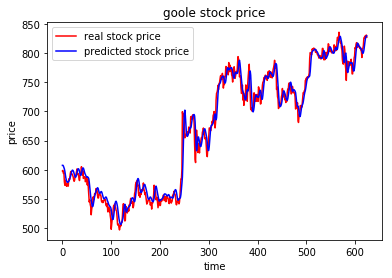

In [64]:
plt.plot(test_data,color='red',label='real stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted stock price')
plt.title('goole stock price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [65]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_data, predicted_stock_price))

In [66]:
print(rmse)

14.840606364986428
